In [1]:

### Week 11

##### Decision Trees and Random Forest 

## Import Libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
## Get the Data

df= pd.read_csv('/Users/taherehehsan/kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


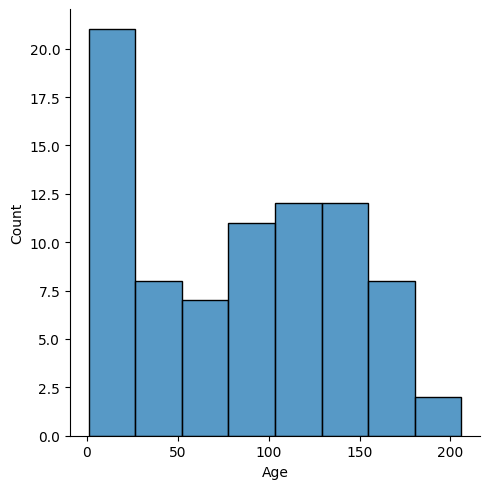

In [5]:

## EDA

sns.displot(x=df['Age'])

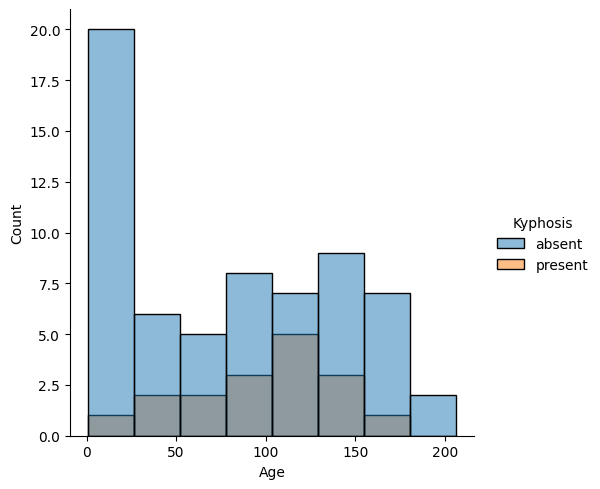

In [6]:
sns.displot(x= df['Age'],hue= df['Kyphosis'] )

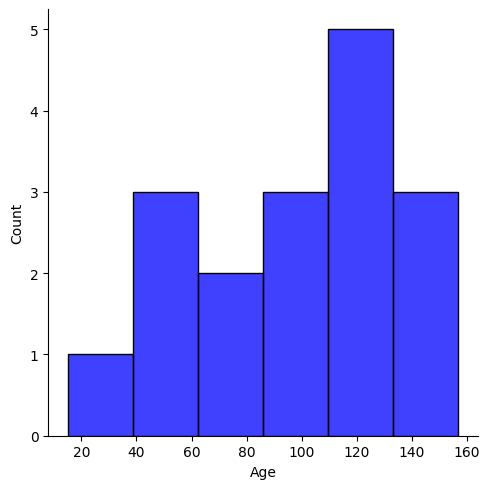

In [10]:
present = df[df['Kyphosis']== 'present']
sns.displot(present['Age'], color= 'blue')

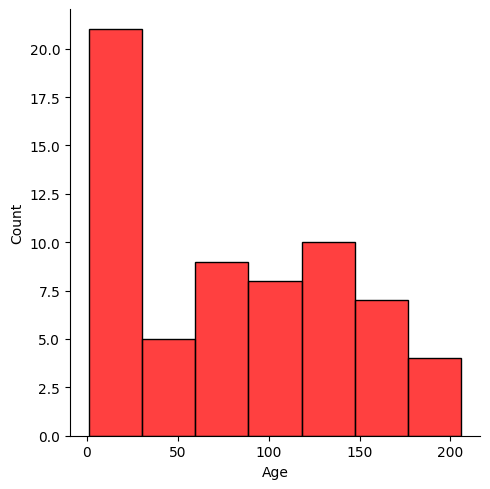

In [9]:
absent= df[df['Kyphosis']== 'absent']
sns.displot(absent['Age'], color= 'red')

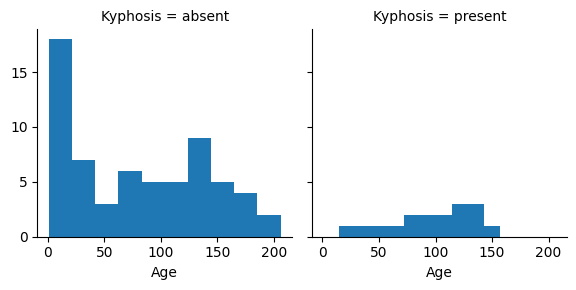

In [11]:
g = sns.FacetGrid(data= df, col= 'Kyphosis')
g.map(plt.hist, 'Age')

In [12]:
## Decision Trees and Random Forest are Supervised Learning so we need :
## Train Test Split

from sklearn.model_selection import train_test_split


In [13]:
x = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.30)

In [15]:

## Decision Trees : sklearn

from sklearn.tree import DecisionTreeClassifier

In [16]:
dtree = DecisionTreeClassifier()

In [17]:
dtree.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [18]:

## Prediction and Evaluation

predictions = dtree.predict(x_test)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      absent       0.77      0.94      0.85        18
     present       0.67      0.29      0.40         7

    accuracy                           0.76        25
   macro avg       0.72      0.62      0.62        25
weighted avg       0.74      0.76      0.72        25



In [21]:
print(confusion_matrix(y_test, predictions))

[[17  1]
 [ 5  2]]


In [22]:

## check y_test and values
len(y_test)

25

In [23]:
sum(y_test== 'absent')

18

In [24]:
sum(y_test== 'present')

7

In [37]:

## Random Forest

from sklearn.ensemble import RandomForestClassifier

In [38]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [39]:
rfc_pred = rfc.predict(x_test)

In [40]:
print(confusion_matrix(y_test, rfc_pred))

[[18  0]
 [ 6  1]]


In [41]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

      absent       0.75      1.00      0.86        18
     present       1.00      0.14      0.25         7

    accuracy                           0.76        25
   macro avg       0.88      0.57      0.55        25
weighted avg       0.82      0.76      0.69        25



In [ ]:

## if we prefer FN to be 0 Random Forest is a better model or vice versa 
## There is a Trade_off between FN and FP 


In [42]:

## Logistic Regression Model

from sklearn.linear_model import LogisticRegression



In [43]:
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [44]:
predictions = logmodel.predict(x_test)

In [48]:
print(confusion_matrix(y_test, predictions))

[[18  0]
 [ 6  1]]


In [49]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      absent       0.75      1.00      0.86        18
     present       1.00      0.14      0.25         7

    accuracy                           0.76        25
   macro avg       0.88      0.57      0.55        25
weighted avg       0.82      0.76      0.69        25

